<a href="https://colab.research.google.com/github/Ritvik10/Data-Science-Overview-Material-Practice-and-Revision/blob/main/Day_40_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Dataset

Link: https://drive.google.com/file/d/1yuKjwkoLygaWP-tGM3B-KYAvQXv3qWOV/view?usp=sharing

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/weight-height.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [8]:
df.shape

(10000, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [12]:
df.drop('Gender', axis=1, inplace=True)

In [13]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height V/s Weight')

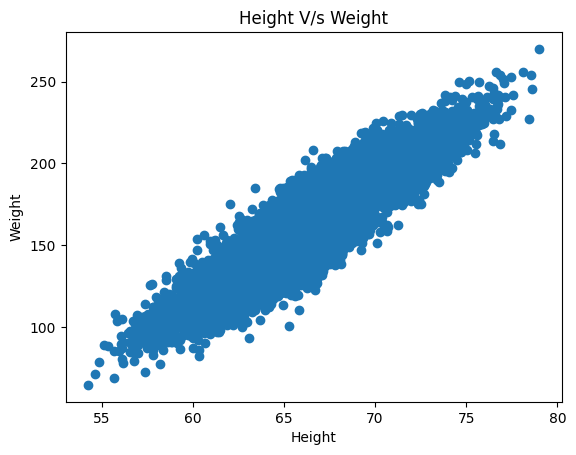

In [14]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height V/s Weight')

In [15]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<Axes: >

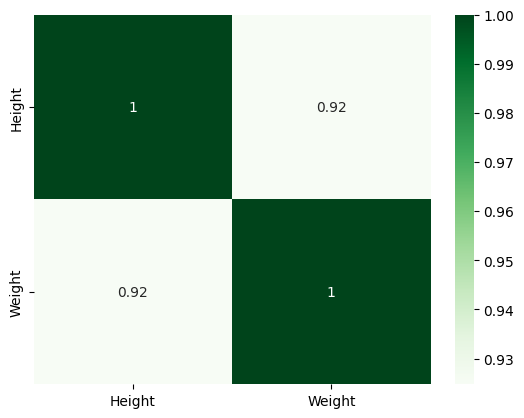

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [17]:
model = LinearRegression()

In [18]:
df.ndim

2

In [19]:
df.Height.ndim

1

In [20]:
df.Height.values.reshape(-1, 1).ndim

2

In [21]:
df.Weight.ndim

1

In [22]:
X = df.Height.values.reshape(-1, 1)
y = df.Weight

In [23]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [24]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [25]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [26]:
len(X)

10000

In [27]:
len(X_train)

9000

In [28]:
len(X_test)

1000

In [29]:
# Training the model

model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_test

9218    156.913240
9413    133.780636
6694    122.580065
5359    138.360765
8183    106.001349
           ...    
7535    137.022386
894     181.360351
7083    157.792424
2160    207.683865
2724    199.602840
Name: Weight, Length: 1000, dtype: float64

In [32]:
y_pred

array([148.06590258, 141.33818934, 129.6511291 , 131.21866535,
       132.50247537, 153.08194875, 181.66592356, 140.00596815,
       168.80772056, 135.12735547, 131.19199813, 183.93793923,
       205.82675942, 110.00703355, 138.79459299, 154.35885655,
       212.68484416, 195.42243664, 151.76153216, 173.8153837 ,
       173.11919694, 157.22397685, 177.91484244, 124.98925805,
       156.85657638, 182.87777555, 141.08023292, 156.21918496,
       167.41843994, 160.95391638, 144.5450281 , 147.4645295 ,
       216.18824468, 225.59229416, 179.89113088, 166.08476118,
       196.93303677, 192.34698701, 164.06777561, 145.13748978,
       208.84105526, 136.36244566, 132.45987416, 179.98644447,
       134.82266471, 136.84199818, 154.85658421, 147.5525231 ,
       193.201656  , 185.3493927 , 196.78731293, 173.49338621,
       119.86433448, 188.00902346, 154.16209724, 190.81977534,
       143.27573935, 206.25108459, 184.83813946, 157.66843221,
       197.79617909, 174.41664713, 184.91802255, 138.79

In [33]:
newdf = pd.DataFrame({"Value of X": X_test.flatten(),
                      "Actual Value": y_test,
                      "Predicted Value": y_pred.flatten()})

In [34]:
newdf.head()

,Value of X,Actual Value,Predicted Value
9218,64.637502,156.913240,148.065903
9413,63.766237,133.780636,141.338189
6694,62.252717,122.580065,129.651129
5359,62.455719,138.360765,131.218665
8183,62.621978,106.001349,132.502475


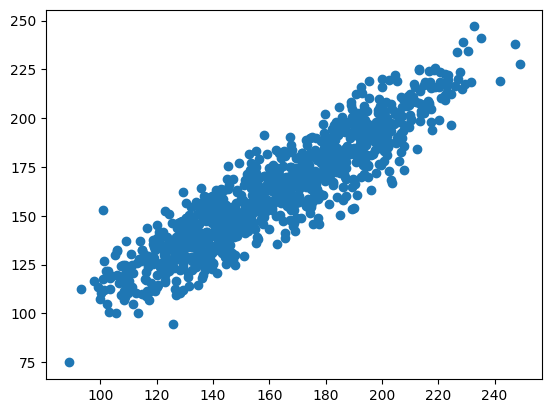

In [35]:
plt.scatter(newdf['Actual Value'], newdf['Predicted Value'])

In [36]:
newdf[['Actual Value', 'Predicted Value']].corr()

,Actual Value,Predicted Value
Actual Value,1.000000,0.916989
Predicted Value,0.916989,1.000000


In [37]:
model.coef_

array([7.72177605])

In [39]:
"""
y = mx + c
y = 7.71932945*x -350.87940124033184
"""

'\ny = mx + c\ny = 7.71932945*x -350.87940124033184\n'

In [40]:
model.intercept_

-351.05041192257124

In [41]:
x = 45
7.71932945*x -350.87940124033184

-3.5095759903318253

In [42]:
(7.71932945*x) -350.87940124033184

-3.5095759903318253

In [43]:
68

68

In [44]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [45]:
df.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [46]:
r2_score(y_test, y_pred)

0.8408047842922395